In [16]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import shap
import time
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
#import eli5

from sklearn.metrics import f1_score
import numpy as np
import random
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
import statistics as st
random.seed(723)
np.random.seed(723)

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
%cd "/content/drive/MyDrive/INRIA/2_12_2022"

/content/drive/MyDrive/INRIA/2_12_2022


In [19]:
! ls

'=4.0.0'						       Untitled
'Copia de 3_46cols_EnvFeatures173samples_plus_3202EC_V2.csv'


In [20]:
dfmatrix_M2=pd.read_csv("Copia de 3_46cols_EnvFeatures173samples_plus_3202EC_V2.csv")
dfmatrix_M2.head(3)



,TSC_Names,PANGAEA.sample.id,Station.label.x,Layer.x,polar.x,Station.label.y,Layer.y,polar.y,Ocean.name,Ocean.key,...,6.4.1.6,6.4.1.7,6.4.1.8,6.4.1.9,6.5.1.1,6.5.1.2,6.5.1.3,6.5.1.4,6.6.1.1,6.6.1.2
0,TSC000,TARA_X000000368,TARA_004,DCM,non polar,TARA_004,DCM,non polar,North Atlantic Ocean,NAO,...,0.002930,0.000502,0.0,0.0,0.000788,0.0,0.000000,0.0,0.078060,0.314242
1,TSC001,TARA_Y200000002,TARA_004,SRF,non polar,TARA_004,SRF,non polar,North Atlantic Ocean,NAO,...,0.000486,0.001156,0.0,0.0,0.000685,0.0,0.000115,0.0,0.100803,0.337892
2,TSC002,TARA_A200000159,TARA_007,DCM,non polar,TARA_007,DCM,non polar,Mediterranean Sea,MS,...,0.003084,0.000000,0.0,0.0,0.003849,0.0,0.000000,0.0,0.117897,0.338007


In [21]:
columns_names = dfmatrix_M2.columns
columns_names

Index(['TSC_Names', 'PANGAEA.sample.id', 'Station.label.x', 'Layer.x',
       'polar.x', 'Station.label.y', 'Layer.y', 'polar.y', 'Ocean.name',
       'Ocean.key',
       ...
       '6.4.1.6', '6.4.1.7', '6.4.1.8', '6.4.1.9', '6.5.1.1', '6.5.1.2',
       '6.5.1.3', '6.5.1.4', '6.6.1.1', '6.6.1.2'],
      dtype='object', length=3248)

In [22]:
%%capture
!pip install scprep phate umap-learn

In [23]:
%%capture
!pip install umap-learn[plot]

In [24]:
%%capture
!pip install joblib==1.1.0

In [25]:
%%capture
!pip install hdbscan

In [26]:
%%capture
!pip install kora

In [27]:
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [28]:
%%capture
!pip install git+https://github.com/SZJShuffle/pySankey2.git

In [29]:
import umap.umap_ as umap
from umap import UMAP
import hdbscan 
import plotly.express as px

In [30]:
dfmatrix_M2.columns[0:45]

Index(['TSC_Names', 'PANGAEA.sample.id', 'Station.label.x', 'Layer.x',
       'polar.x', 'Station.label.y', 'Layer.y', 'polar.y', 'Ocean.name',
       'Ocean.key', 'Marine.Regions.Geographic.ID', 'Event.date', 'Year',
       'Month', 'lower.size.fraction', 'upper.size.fraction', 'Latitude',
       'Longitude', 'Depth.nominal', 'Temperature', 'Oxygen', 'ChlorophyllA',
       'Carbon.total', 'Salinity', 'Gradient.Surface.temp.SST.',
       'Fluorescence', 'CO3', 'HCO3', 'Density', 'PO4', 'PAR.PC', 'NO3', 'Si',
       'Alkalinity.total', 'Ammonium.5m', 'Depth.Mixed.Layer', 'Lyapunov',
       'NO2', 'Depth.Min.O2', 'NO2NO3', 'Nitracline', 'Brunt.VÃ.isÃ.lÃ.',
       'Iron.5m', 'Depth.Max.O2', 'Okubo.Weiss'],
      dtype='object')

In [31]:
umap_dfmatrix_M2 = umap.UMAP(n_neighbors=50,n_components=3, min_dist=0.1, spread=1.0,random_state=42)
umap_dfmatrix_M2_3D = umap_dfmatrix_M2.fit_transform(dfmatrix_M2.drop(columns=["TSC_Names","PANGAEA.sample.id","Station.label.x","Layer.x","polar.x",	"Station.label.y","Layer.y","polar.y","Ocean.name",	"Ocean.key", 'Marine.Regions.Geographic.ID', 'Event.date', 'Year',
       'Month', 'lower.size.fraction', 'upper.size.fraction', 'Latitude',
       'Longitude', 'Depth.nominal', 'Temperature', 'Oxygen', 'ChlorophyllA',
       'Carbon.total', 'Salinity', 'Gradient.Surface.temp.SST.',
       'Fluorescence', 'CO3', 'HCO3', 'Density', 'PO4', 'PAR.PC', 'NO3', 'Si',
       'Alkalinity.total', 'Ammonium.5m', 'Depth.Mixed.Layer', 'Lyapunov',
       'NO2', 'Depth.Min.O2', 'NO2NO3', 'Nitracline', 'Brunt.VÃ.isÃ.lÃ.',
       'Iron.5m', 'Depth.Max.O2', 'Okubo.Weiss']))	                                                                                
                                                                                
labels_umap_dfmatrix_M2_3D= hdbscan.HDBSCAN().fit_predict(umap_dfmatrix_M2_3D)

In [32]:
###Hasta aquí funcionaba

In [33]:
labels_umap_dfmatrix_M2_colors_v2=labels_umap_dfmatrix_M2_3D.astype(str)
labels_umap_dfmatrix_M2_colors_v2


array(['4', '4', '1', '1', '1', '1', '2', '2', '4', '4', '1', '1', '4',
       '4', '4', '0', '1', '1', '3', '3', '1', '1', '0', '1', '0', '1',
       '4', '4', '2', '2', '3', '3', '1', '4', '4', '4', '-1', '4', '4',
       '1', '3', '1', '0', '1', '1', '0', '1', '1', '1', '-1', '3', '3',
       '3', '0', '1', '1', '0', '1', '0', '0', '1', '3', '3', '3', '1',
       '1', '4', '2', '2', '2', '4', '4', '4', '1', '1', '0', '1', '3',
       '3', '3', '3', '1', '0', '1', '4', '4', '4', '1', '0', '1', '2',
       '2', '2', '3', '3', '3', '2', '2', '2', '4', '4', '1', '1', '1',
       '1', '0', '1', '2', '2', '2', '-1', '0', '1', '1', '0', '1', '4',
       '1', '2', '2', '2', '4', '4', '2', '2', '4', '4', '0', '1', '4',
       '4', '2', '2', '3', '3', '1', '1', '0', '4', '-1', '4', '4', '1',
       '4', '1', '4', '1', '1', '1', '1', '0', '4', '1', '0', '1', '3',
       '3', '1', '1', '4', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '0', '4'], dtype='<U21')

In [34]:
##dfmatrix_M2["clusterID"]= pd.Series(labels_umap_dfmatrix_M2_colors_v2)
#dfmatrix_M2.head(

In [35]:
###Aquí graficaré los datos 

In [36]:
UMAP_dfmatrix_M2 = px.scatter_3d(umap_dfmatrix_M2_3D, x=0, y=1, z=2,width=1200, height=900,opacity=.4,
                                     template="plotly_white", color=labels_umap_dfmatrix_M2_colors_v2,
                                     labels={"0": "Dimension 1 (UMAP)","1": "Dimension 2 (UMAP)","2": "Dimension 3 (UMAP)"})
UMAP_dfmatrix_M2.update_traces(marker_size=12)
UMAP_dfmatrix_M2.update_layout(legend_itemsizing="trace", legend_bgcolor="white", legend_font_size=30, legend_title="Location", font=dict( size=16))
UMAP_dfmatrix_M2.show()

In [37]:
###Ahora coloreo según nivel del mar
dfmatrix_M2.columns

Index(['TSC_Names', 'PANGAEA.sample.id', 'Station.label.x', 'Layer.x',
       'polar.x', 'Station.label.y', 'Layer.y', 'polar.y', 'Ocean.name',
       'Ocean.key',
       ...
       '6.4.1.6', '6.4.1.7', '6.4.1.8', '6.4.1.9', '6.5.1.1', '6.5.1.2',
       '6.5.1.3', '6.5.1.4', '6.6.1.1', '6.6.1.2'],
      dtype='object', length=3248)

In [38]:
UMAP2_dfmatrix_M2 = px.scatter_3d(umap_dfmatrix_M2_3D, x=0, y=1, z=2,width=1200, height=900,opacity=.4,
                                     template="plotly_white", color=dfmatrix_M2["Layer.x"],
                                     labels={"0": "Dimension 1 (UMAP)","1": "Dimension 2 (UMAP)","2": "Dimension 3 (UMAP)"})
UMAP2_dfmatrix_M2.update_traces(marker_size=12)
UMAP2_dfmatrix_M2.update_layout(legend_itemsizing="trace", legend_bgcolor="white", legend_font_size=30, legend_title="Location", font=dict( size=16))
UMAP2_dfmatrix_M2.show()

In [39]:
UMAP3_dfmatrix_M2 = px.scatter_3d(umap_dfmatrix_M2_3D, x=0, y=1, z=2,width=1200, height=900,opacity=.4,
                                     template="plotly_white", color=dfmatrix_M2["polar.x"],
                                     labels={"0": "Dimension 1 (UMAP)","1": "Dimension 2 (UMAP)","2": "Dimension 3 (UMAP)"})
UMAP3_dfmatrix_M2.update_traces(marker_size=12)
UMAP3_dfmatrix_M2.update_layout(legend_itemsizing="trace", legend_bgcolor="white", legend_font_size=30, legend_title="Location", font=dict( size=16))
UMAP3_dfmatrix_M2.show()

In [40]:
UMAP4_dfmatrix_M2 = px.scatter_3d(umap_dfmatrix_M2_3D, x=0, y=1, z=2,width=1200, height=900,opacity=.4,
                                     template="plotly_white", color=dfmatrix_M2["Ocean.name"],
                                     labels={"0": "Dimension 1 (UMAP)","1": "Dimension 2 (UMAP)","2": "Dimension 3 (UMAP)"})
UMAP4_dfmatrix_M2.update_traces(marker_size=12)
UMAP4_dfmatrix_M2.update_layout(legend_itemsizing="trace", legend_bgcolor="white", legend_font_size=30, legend_title="Location", font=dict( size=16))
UMAP4_dfmatrix_M2.show()

In [41]:
UMAP5_dfmatrix_M2 = px.scatter_3d(umap_dfmatrix_M2_3D, x=0, y=1, z=2,width=1200, height=900,opacity=.4,
                                     template="plotly_white", color=dfmatrix_M2["Oxygen"],
                                     labels={"0": "Dimension 1 (UMAP)","1": "Dimension 2 (UMAP)","2": "Dimension 3 (UMAP)"})
UMAP5_dfmatrix_M2.update_traces(marker_size=12)
UMAP5_dfmatrix_M2.update_layout(legend_itemsizing="trace", legend_bgcolor="white", legend_font_size=30, legend_title="oxygen", font=dict( size=16))
UMAP5_dfmatrix_M2.show()

In [42]:
##Ahora hacer XGboost con la columna cluster como target, y todo el resto (menos sample,  cluster y layer) será mi feature 


In [43]:
dfmatrix_M2["clusterID"]= pd.Series(labels_umap_dfmatrix_M2_colors_v2)
dfmatrix_M2.head()

,TSC_Names,PANGAEA.sample.id,Station.label.x,Layer.x,polar.x,Station.label.y,Layer.y,polar.y,Ocean.name,Ocean.key,...,6.4.1.7,6.4.1.8,6.4.1.9,6.5.1.1,6.5.1.2,6.5.1.3,6.5.1.4,6.6.1.1,6.6.1.2,clusterID
0,TSC000,TARA_X000000368,TARA_004,DCM,non polar,TARA_004,DCM,non polar,North Atlantic Ocean,NAO,...,0.000502,0.000000,0.0,0.000788,0.0,0.000000,0.0,0.078060,0.314242,4
1,TSC001,TARA_Y200000002,TARA_004,SRF,non polar,TARA_004,SRF,non polar,North Atlantic Ocean,NAO,...,0.001156,0.000000,0.0,0.000685,0.0,0.000115,0.0,0.100803,0.337892,4
2,TSC002,TARA_A200000159,TARA_007,DCM,non polar,TARA_007,DCM,non polar,Mediterranean Sea,MS,...,0.000000,0.000000,0.0,0.003849,0.0,0.000000,0.0,0.117897,0.338007,1
3,TSC003,TARA_A200000113,TARA_007,SRF,non polar,TARA_007,SRF,non polar,Mediterranean Sea,MS,...,0.000000,0.000000,0.0,0.000806,0.0,0.000000,0.0,0.084389,0.361594,1
4,TSC004,TARA_X000001036,TARA_009,DCM,non polar,TARA_009,DCM,non polar,Mediterranean Sea,MS,...,0.001124,0.000081,0.0,0.003479,0.0,0.000147,0.0,0.050516,0.291635,1


In [44]:
target = dfmatrix_M2["clusterID"]
display(target.head(2))

0    4
1    4
Name: clusterID, dtype: object

In [45]:
features = dfmatrix_M2.drop(columns=['TSC_Names', 'PANGAEA.sample.id', 'Station.label.x', 'Layer.x',
       'polar.x', 'Station.label.y', 'Layer.y', 'polar.y', 'Ocean.name',
       'Ocean.key', 'Marine.Regions.Geographic.ID', 'Event.date', 'Year',
       'Month', 'lower.size.fraction', 'upper.size.fraction', 'Latitude',
       'Longitude', 'Depth.nominal', 'Temperature', 'Oxygen', 'ChlorophyllA',
       'Carbon.total', 'Salinity', 'Gradient.Surface.temp.SST.',
       'Fluorescence', 'CO3', 'HCO3', 'Density', 'PO4', 'PAR.PC', 'NO3', 'Si',
       'Alkalinity.total', 'Ammonium.5m', 'Depth.Mixed.Layer', 'Lyapunov',
       'NO2', 'Depth.Min.O2', 'NO2NO3', 'Nitracline', 'Brunt.VÃ.isÃ.lÃ.',
       'Iron.5m', 'Depth.Max.O2', 'Okubo.Weiss',"Residence.time","clusterID"])
display(features.head(2))

,1.10.2.2,1.10.3.1,1.10.3.10,1.10.3.12,1.10.3.14,1.10.3.15,1.10.3.16,1.10.3.2,1.10.3.3,1.10.3.4,...,6.4.1.6,6.4.1.7,6.4.1.8,6.4.1.9,6.5.1.1,6.5.1.2,6.5.1.3,6.5.1.4,6.6.1.1,6.6.1.2
0,0.090827,0.0,0.021249,0.000592,0.001696,0.0,0.0,0.0,0.0,0.0,...,0.002930,0.000502,0.0,0.0,0.000788,0.0,0.000000,0.0,0.078060,0.314242
1,0.087123,0.0,0.013808,0.000560,0.005361,0.0,0.0,0.0,0.0,0.0,...,0.000486,0.001156,0.0,0.0,0.000685,0.0,0.000115,0.0,0.100803,0.337892


In [46]:
seed = 110
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.20, 
                                                    random_state=seed, 
                                                    shuffle=True, 
                                                    stratify=target)

In [47]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Columns: 3202 entries, 1.10.2.2 to 6.6.1.2
dtypes: float64(3202)
memory usage: 4.2 MB


In [48]:
xgboot_clusterID_classification = XGBClassifier(
    tree_method = "gpu_hist",
    objective='multi:softmax',
    random_state=seed, 
    eval_metric=["merror"],
    colsample_bytree= 0.8,
    gamma= 0,
    learning_rate= 0.1,
    max_depth= 3,
    n_estimators= 100,
    reg_lambda= 1.0,
    scale_pos_weight= 1,
    subsample= 1.0)

In [49]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["merror","mlogloss"]

In [50]:
%time xgboot_clusterID_classification.fit(X_train, y_train, eval_set=eval_set, eval_metric=eval_metric, verbose=True)

[0]	validation_0-merror:0.130435	validation_0-mlogloss:1.62289	validation_1-merror:0.657143	validation_1-mlogloss:1.74752
[1]	validation_0-merror:0.036232	validation_0-mlogloss:1.47011	validation_1-merror:0.685714	validation_1-mlogloss:1.70999
[2]	validation_0-merror:0.050725	validation_0-mlogloss:1.35386	validation_1-merror:0.6	validation_1-mlogloss:1.66126
[3]	validation_0-merror:0.021739	validation_0-mlogloss:1.24093	validation_1-merror:0.6	validation_1-mlogloss:1.64516
[4]	validation_0-merror:0	validation_0-mlogloss:1.14173	validation_1-merror:0.6	validation_1-mlogloss:1.62055
[5]	validation_0-merror:0.007246	validation_0-mlogloss:1.05667	validation_1-merror:0.628571	validation_1-mlogloss:1.6046
[6]	validation_0-merror:0	validation_0-mlogloss:0.975639	validation_1-merror:0.657143	validation_1-mlogloss:1.6036
[7]	validation_0-merror:0	validation_0-mlogloss:0.901545	validation_1-merror:0.657143	validation_1-mlogloss:1.5841
[8]	validation_0-merror:0	validation_0-mlogloss:0.837326	vali

XGBClassifier(colsample_bytree=0.8, eval_metric=['merror'],
              objective='multi:softprob', random_state=110, reg_lambda=1.0,
              subsample=1.0, tree_method='gpu_hist')

In [52]:
pred_test = xgboot_clusterID_classification.predict(X_test)
pred_train = xgboot_clusterID_classification.predict(X_train)
print('Train Accuracy: ', accuracy_score(y_train, pred_train))
print('Test Accuracy: ', accuracy_score(y_test, pred_test))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test,pred_test))
print('\nClassification Report:')
print(classification_report(y_test,pred_test))

Train Accuracy:  1.0
Test Accuracy:  0.4

Confusion Matrix:
[[0 0 0 1 0 0]
 [0 2 0 1 0 1]
 [0 0 9 0 1 3]
 [0 1 3 1 0 0]
 [0 1 1 0 2 0]
 [0 0 7 1 0 0]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.50      0.50      0.50         4
           1       0.45      0.69      0.55        13
           2       0.25      0.20      0.22         5
           3       0.67      0.50      0.57         4
           4       0.00      0.00      0.00         8

    accuracy                           0.40        35
   macro avg       0.31      0.32      0.31        35
weighted avg       0.34      0.40      0.36        35



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [53]:
import matplotlib.pyplot as plt

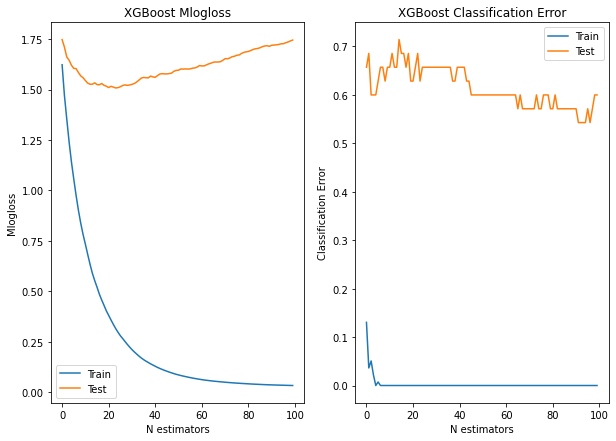

<Figure size 432x288 with 0 Axes>

In [54]:
# retrieve performance metrics
results = xgboot_clusterID_classification.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
fig, ax = plt.subplots(1, 2, figsize=(10,7))

# plot Mglogloss
ax[0].plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax[0].plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax[0].legend()
ax[0].set_title('XGBoost Mlogloss')
ax[0].set_ylabel('Mlogloss')
ax[0].set_xlabel('N estimators')


# plot classification error
ax[1].plot(x_axis, results['validation_0']['merror'], label='Train')
ax[1].plot(x_axis, results['validation_1']['merror'], label='Test')
ax[1].legend()
ax[1].set_title('XGBoost Classification Error')
ax[1].set_ylabel('Classification Error')
ax[1].set_xlabel('N estimators')
plt.show()
plt.tight_layout()

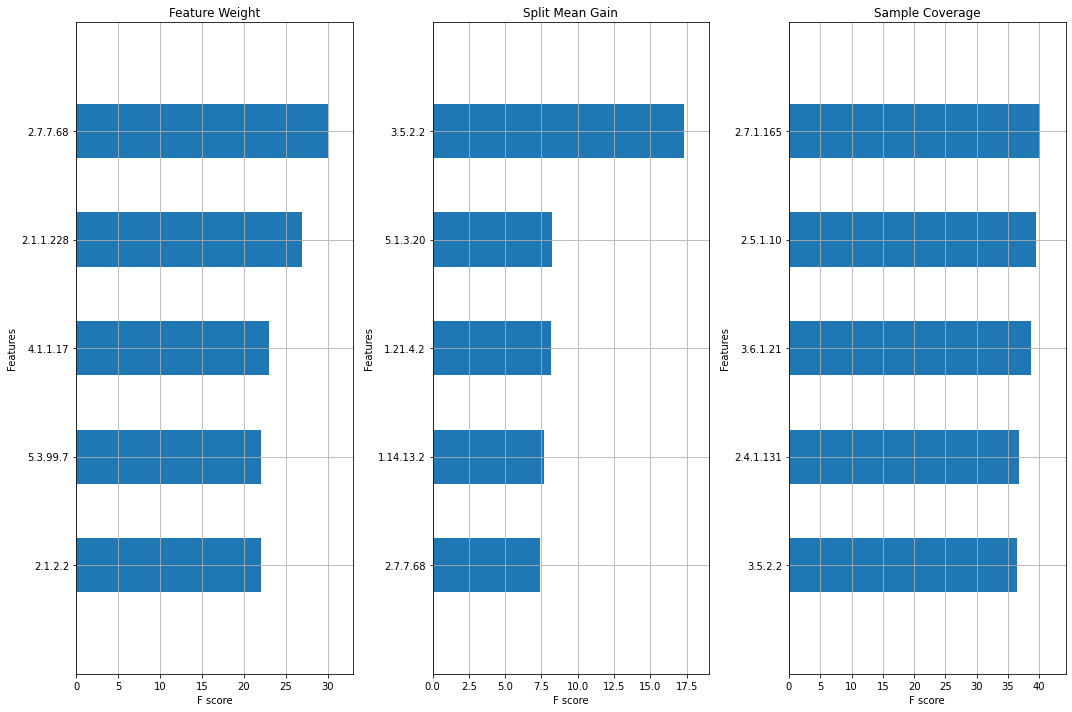

In [55]:
import xgboost as xgb

# store the winning model in a new variable
xgc = xgboot_clusterID_classification
# saving the feature names to the model
xgc.get_booster().feature_names = X_train.columns.to_list()

# Create the feature importances plot
fig, ax = plt.subplots(1, 3, figsize=(15,10))

# plot importances with feature weight
# "weight" is the number of times a feature appears in a tree
xgb.plot_importance(
    booster=xgc, 
    importance_type='weight',
    max_num_features=5,
    title='Feature Weight',
    show_values=False,
    height=0.5,
    ax=ax[0],
)

# plot importances with split mean gain
# "gain" is the average gain of splits which use the feature
xgb.plot_importance(
    booster=xgc,
    importance_type='gain',
    max_num_features=5,
    title='Split Mean Gain',
    show_values=False,
    height=0.5,
    ax=ax[1]
)

# plot importances with sample coverage
# "cover" is the average coverage of splits which use the feature 
# where coverage is defined as the number of samples affected by 
# the split max_num_features

xgb.plot_importance(
    xgc,
    importance_type='cover',
    title='Sample Coverage',
    max_num_features=5,
    show_values=False,
    height=0.5,
    ax=ax[2]
)

plt.tight_layout()
plt.show()